# VinBigData Analysis

This notebook goes over some really fast analysis for understanding the data.

In [3]:
import pandas as pd

## See what we have to work with

We will load in the csv from https://www.kaggle.com/sunghyunjun/vinbigdata-1024-jpg-dataset. This CSV is special because it also features the raw height/width as well as the rescaled height/width. Not all the images availabe in the dataset are square, so we unfortunately lose some quality information due to this rescaling. If you so choose, once you are done downloading the dataset, put it in the `vbd_vol` folder. Extract the main jpg folder, rename it to `train_jpgs`, and put it in the root of `vbd_vol`. However, you do not need this data for right now.

In [4]:
csv_path = '../../vbd_vol/train_jpgs.csv'

In [5]:
df = pd.read_csv(csv_path)
df.head()

,Unnamed: 0,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,raw_x_min,raw_x_max,raw_y_min,raw_y_max,raw_width,raw_height,scale_x,scale_y
0,0,78aa8415fbf1c792f7d7c53349d44d4f,No finding,14,R16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3000.0,3000.0,0.341333,0.341333
1,1,78aa8415fbf1c792f7d7c53349d44d4f,No finding,14,R17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3000.0,3000.0,0.341333,0.341333
2,2,78aa8415fbf1c792f7d7c53349d44d4f,No finding,14,R11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3000.0,3000.0,0.341333,0.341333
3,3,183015e171f5159d7e60d43578632a3f,Aortic enlargement,0,R8,567.0,295.0,671.0,417.0,1134.0,1342.0,721.0,1019.0,2048.0,2500.0,0.500000,0.409600
4,4,183015e171f5159d7e60d43578632a3f,Pleural thickening,11,R9,58.0,794.0,116.0,851.0,117.0,232.0,1938.0,2077.0,2048.0,2500.0,0.500000,0.409600


After some digging, we see that there are uniquely 150000 images in this dataset. By the way, each row corresponds to a bounding box or the absence of one (in which case you will Nan values in the columns corresponding to the bounding box vertices). Doing a simple group by an analyzing the shape allows us to see the number of unique images.

In [6]:
df.groupby("image_id").count()

,Unnamed: 0,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,raw_x_min,raw_x_max,raw_y_min,raw_y_max,raw_width,raw_height,scale_x,scale_y
image_id,,,,,,,,,,,,,,,,
000434271f63a053c4128a0ba6352c7f,3,3,3,3,0,0,0,0,0,0,0,0,3,3,3,3
00053190460d56c53cc3e57321387478,3,3,3,3,0,0,0,0,0,0,0,0,3,3,3,3
0005e8e3701dfb1dd93d53e2ff537b6e,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
0006e0a85696f6bb578e84fafa9a5607,3,3,3,3,0,0,0,0,0,0,0,0,3,3,3,3
0007d316f756b3fa0baea2ff514ce945,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffe6f9fe648a7ec29a50feb92d6c15a4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
ffea246f04196af602c7dc123e5e48fc,3,3,3,3,0,0,0,0,0,0,0,0,3,3,3,3
ffeffc54594debf3716d6fcd2402a99f,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


Digging even further, we see that there are uniquely 4394 images within the VinBigData that correspond to unhealthy patients. This is amazing compared to the NIH dataset, which only features about 1000 bounding box images.

In [7]:
bbox_df = df.dropna()
bbox_df.groupby('image_id').count()

,Unnamed: 0,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,raw_x_min,raw_x_max,raw_y_min,raw_y_max,raw_width,raw_height,scale_x,scale_y
image_id,,,,,,,,,,,,,,,,
0005e8e3701dfb1dd93d53e2ff537b6e,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
0007d316f756b3fa0baea2ff514ce945,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
000d68e42b71d3eac10ccc077aba07c1,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
00150343289f317a0ad5629d5b7d9ef9,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
001d127bad87592efe45a5c7678f8b8d,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff924bcbd38f123aec723aa7040d7e43,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
ffb5d0b005261ed350f7a08c06613a34,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
ffceb71a80efba3b83c88e11f4b9694b,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


Broken down by disease, we can see how many bounding boxes correspond to each disease. A quick perusal of the dataframe shows some massive inequalities within the data distribution.

In [8]:
groups = bbox_df.groupby('class_name').count()[['image_id']]
groups.columns = ['counts']
groups

,counts
class_name,
Aortic enlargement,7162
Atelectasis,279
Calcification,960
Cardiomegaly,5427
Consolidation,556
ILD,1000
Infiltration,1247
Lung Opacity,2483
Nodule/Mass,2580


## Plotting the Words

Here we will take a visual approach to describing the data that we have talked about previously

In [9]:
import matplotlib.pyplot as plt

Here is a bar plot showing the inequality in the number of images that have evidence of abnormality versus those that don't. This would potentially be problematic if we were solving a classification problem. However, for object detection, we need to be training on images that contain unhealthy patients. As a result, we only are concerned with the right bar. Nonetheless, we would like to have more training data, so in a sense, the inequality still hinders the model from being trained on a large set of data.

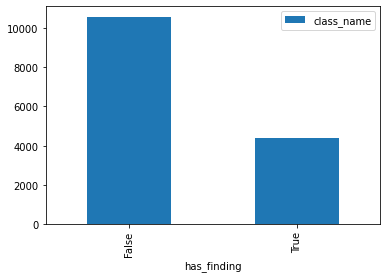

In [10]:
df['has_finding'] = df['class_name'].apply(lambda x : x != 'No finding')
has_findings = df.drop_duplicates('image_id').groupby('has_finding').count()[['class_name']]
has_findings.plot.bar(y='class_name')
plt.show()

In [11]:
df.drop_duplicates('image_id').groupby('has_finding').count()['image_id']

has_finding
False    10606
True      4394
Name: image_id, dtype: int64

Recall that we talked about the distribution of the bounding box counts per disease. Visually, here is a pie chart to display the same information. Based on the slices, you can see that the classes such as Calcification, Atelectasis, and Pneumothrax are lacking in numbers. As a future task, we could potentially utilize datasets that specialize in these classes and combine them with VinBigData to flatten the distribution. 

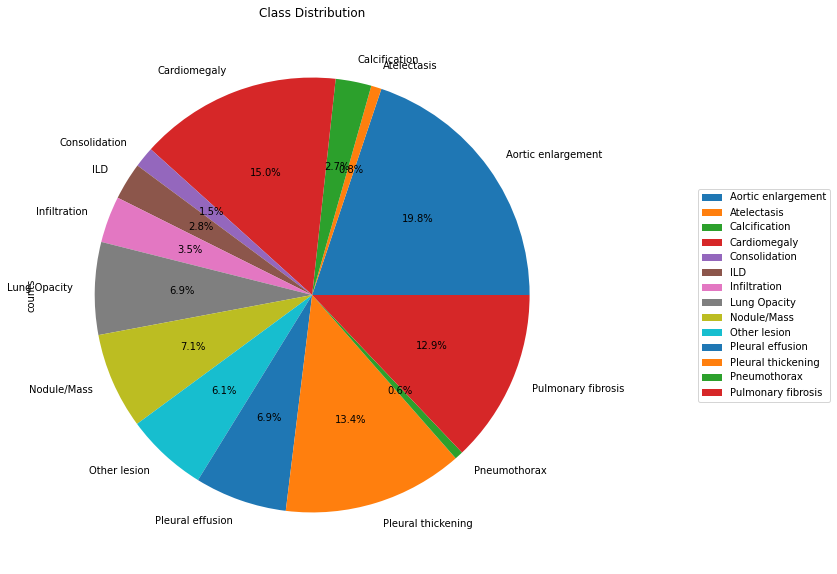

In [13]:
ax = groups.plot.pie(y='counts', title="Class Distribution", figsize=(10, 10), autopct='%1.1f%%')
ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

This is the end of the analysis part of the notebook. The rest is used for scratch work.

# Scratch Work

The work below is continued on in the `modeling/tf_obj/data_preprocessing_vbd.ipynb` notebook. Here, we will convert the large jpg label table into a csv that is more digestable.

## Remaking the CSV

<b>Note</b>: Don't mind the warnings.

In [14]:
bbox_df['w'] = bbox_df['x_max'] - bbox_df['x_min']
bbox_df['h'] = bbox_df['y_max'] - bbox_df['y_min']
bbox_df['x'] = bbox_df['x_min']
bbox_df['y'] = bbox_df['y_min']
bbox_df['Target'] = bbox_df['class_name']
bbox_df['Image_Index'] = bbox_df['image_id'].apply(lambda x : x + '.jpg')
new_bbox_df = bbox_df[['Image_Index', 'Target', 'x', 'y', 'w', 'h']]
new_bbox_df = new_bbox_df.reset_index(drop='index')
new_bbox_df

/home/fcr/anaconda3/envs/workspace/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/fcr/anaconda3/envs/workspace/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/fcr/anaconda3/envs/workspace/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,Image_Index,Target,x,y,w,h
0,183015e171f5159d7e60d43578632a3f.jpg,Aortic enlargement,567.0,295.0,104.0,122.0
1,183015e171f5159d7e60d43578632a3f.jpg,Pleural thickening,58.0,794.0,58.0,57.0
2,183015e171f5159d7e60d43578632a3f.jpg,Pleural effusion,58.0,794.0,58.0,57.0
3,183015e171f5159d7e60d43578632a3f.jpg,Aortic enlargement,573.0,296.0,97.0,77.0
4,183015e171f5159d7e60d43578632a3f.jpg,Pleural thickening,72.0,813.0,38.0,51.0
...,...,...,...,...,...,...
36091,bdd8423e5deae0ae5dc7e0547887fafc.jpg,Aortic enlargement,434.0,236.0,150.0,149.0
36092,bdd8423e5deae0ae5dc7e0547887fafc.jpg,Lung Opacity,174.0,121.0,215.0,79.0
36093,bdd8423e5deae0ae5dc7e0547887fafc.jpg,Pleural thickening,174.0,121.0,215.0,79.0
36094,bdd8423e5deae0ae5dc7e0547887fafc.jpg,Pleural effusion,78.0,394.0,339.0,289.0


In [15]:
import os
data_path = '../../vbd_vol/train_jpgs'
path_csv = new_bbox_df[['Image_Index']].copy(deep=True)
path_csv = path_csv.drop_duplicates().reset_index(drop='index')
path_csv['path'] = path_csv['Image_Index'].apply(lambda x : os.path.join(data_path, x))
path_csv

,Image_Index,path
0,183015e171f5159d7e60d43578632a3f.jpg,../../vbd_vol/train_jpgs/183015e171f5159d7e60d...
1,e1eb9553f694d0eba82535625d70186c.jpg,../../vbd_vol/train_jpgs/e1eb9553f694d0eba8253...
2,97bd8561208807d003ff804d69348974.jpg,../../vbd_vol/train_jpgs/97bd8561208807d003ff8...
3,16241940f17e8c7aae3e6236b25a7c84.jpg,../../vbd_vol/train_jpgs/16241940f17e8c7aae3e6...
4,9850d20ee4d2bf722154a90ae07ddff8.jpg,../../vbd_vol/train_jpgs/9850d20ee4d2bf722154a...
...,...,...
4389,bb315b4bc113c0506a9e24593cb06a6b.jpg,../../vbd_vol/train_jpgs/bb315b4bc113c0506a9e2...
4390,a3dcbf04ea4cf926b6efb6ac526d5ff9.jpg,../../vbd_vol/train_jpgs/a3dcbf04ea4cf926b6efb...
4391,4c029c4f3deed9414b157053867709b0.jpg,../../vbd_vol/train_jpgs/4c029c4f3deed9414b157...
4392,a9ed4b5aaf129325369ebae1cfd5e321.jpg,../../vbd_vol/train_jpgs/a9ed4b5aaf129325369eb...


In [67]:
new_bbox_df.to_csv('../../vbd_vol/bbox_table.csv', index=False)
path_csv.to_csv('../../vbd_vol/path_table.csv', index=False)